1) Import Libraries + Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ทำให้กราฟสวยขึ้น
sns.set(style="whitegrid")

# Load dataset
file_path = "../data/raw/online_retail_II.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


2) ดูโครงสร้างข้อมูล

In [11]:
print(df.shape)          # ดูขนาดข้อมูล
print(df.info())         # ดูประเภทข้อมูล
df.describe()            # สถิติพื้นฐาน


(1067371, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB
None


,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


3) ตรวจสอบ Missing Values

In [12]:
df.isnull().sum()


Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

4) ลบแถวที่ไม่มี Customer ID

In [13]:
df = df[df["Customer ID"].notnull()]


5) ลบแถวที่ Quantity ≤ 0 หรือ Price ≤ 0

In [14]:
df = df[(df["Quantity"] > 0) & (df["Price"] > 0)]


6) แปลง InvoiceDate ให้เป็น datetime

In [15]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


7) สร้างคอลัมน์ TotalPrice

In [16]:
df["TotalPrice"] = df["Quantity"] * df["Price"]
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


8) ตรวจ Outliers แบบง่ายด้วย Boxplot

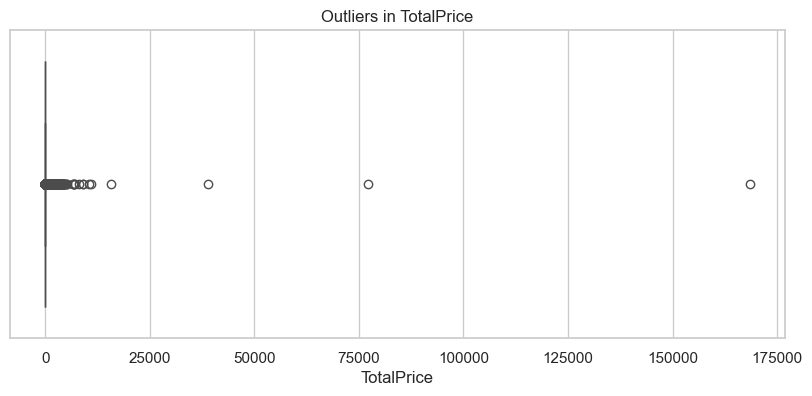

In [17]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df["TotalPrice"])
plt.title("Outliers in TotalPrice")
plt.show()


9) ตัด outliers ที่ใหญ่เกิน (เช่น > 10,000)

In [18]:
df = df[df["TotalPrice"] < 10000]


10) ตรวจดูยอดขายรายประเทศ

In [19]:
df["Country"].value_counts().head(10)


Country
United Kingdom    725244
Germany            16694
EIRE               15743
France             13812
Netherlands         5088
Spain               3719
Belgium             3068
Switzerland         3011
Portugal            2446
Australia           1812
Name: count, dtype: int64

11) บันทึกข้อมูลที่ผ่านการทำความสะอาดแล้ว

In [20]:
clean_path = "../data/processed/online_retail_cleaned.csv"
df.to_csv(clean_path, index=False)

clean_path


'../data/processed/online_retail_cleaned.csv'

12) แสดงผลลัพธ์หลังทำความสะอาด

In [21]:
print("Shape after cleaning:", df.shape)
df.head()


Shape after cleaning: (805543, 9)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0
